# Materials

In [1]:
%matplotlib inline
import math
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
c_fck = np.array([20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90])
c_epsc2 = np.array( [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.3, 2.4 , 2.5, 2.6])
c_epscu2 = np.array([3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 2.9, 2.7 , 2.6, 2.6])
c_n = np.array(     [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.6, 1.45, 1.4, 1.4])

In [3]:
f = open("eurocodes.json", "r")
database = json.loads(f.read())
concs = database["Eurocodes"]["Materials"]["Concrete"]
reinfs = database["Eurocodes"]["Materials"]["Reinforcement"]
prestr = database["Eurocodes"]["Materials"]["Prestress"]
ec2conc = pd.DataFrame.from_dict(concs["Classes"])
ec2reinf = pd.DataFrame.from_dict(reinfs["Classes"])

In [4]:
ec2conc

,C20/25,C25/30,C30/37,C35/45,C40/50,C45/45,C50/55,C55/67,C60/75,C70/85
fck,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.00,60.0,70.00
fcm,28.0,33.0,38.0,43.0,48.0,53.0,58.0,63.00,68.0,78.00
fctm,2.2,2.6,2.9,3.2,3.5,3.8,4.1,4.20,4.4,4.60
fctk05,1.5,1.8,2.0,2.2,2.5,2.7,2.9,3.00,3.1,3.20
Ecm,30000.0,31000.0,33000.0,34000.0,35000.0,36000.0,37000.0,38000.00,39000.0,41000.00
epsc2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.20,2.3,2.40
epscu2,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.10,2.9,2.70
n,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.75,1.6,1.45


In [5]:
ec2reinf

,A500EL,A400NR,A500NR,A400NR SD,A500NR SD
T,A,B,B,C,C
fyk,500.0,400.0,500.0,400.0,500.0
epsuk,25.0,50.0,50.0,75.0,75.0
ftk,525.0,432.0,525.0,460.0,575.0
Es,200000.0,200000.0,200000.0,200000.0,200000.0


## Concrete diagrams

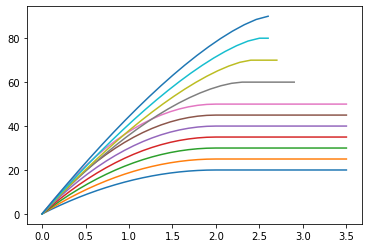

In [7]:
n = 20
eps = np.linspace(0, 1, n)
for i in range(11):
    stres = 1.0-np.power(1.0-np.linspace(0, 1, n), c_n[i])
    eps2 = np.concatenate((eps*c_epsc2[i] , np.linspace(c_epsc2[i],c_epscu2[i],3)))
    stres2 = np.concatenate((stres, np.ones(3)))*c_fck[i]
    plt.plot(eps2, stres2)

## Evolução das propriedades no tempo

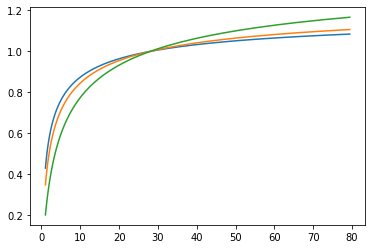

In [10]:
# cement type parameter s
# s = 0.20, endurecimento rápido R: CEM42,5R, CEM52,5N e CEM52,5R
# s = 0.25, endurecimento normal N: CEM32,5R, CEM42,5N
# s = 0.38, endurecimento lento S: CEM32,5N
s = [0.2, 0.25, 0.38]
n = 50
t = np.logspace(0.01, 1.9, n)
# Resistência à compressão
for i in range(3):
    betha_cc = np.exp(s[i]*(1.0-np.sqrt(28.0/t)))
    plt.plot(t, betha_cc)

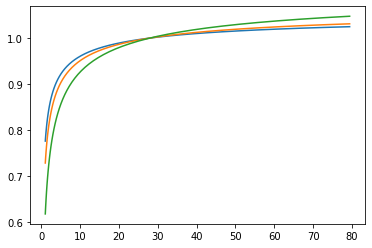

In [11]:
# Módulo de elasticidade

for i in range(3):
    betha_cc = np.exp(s[i]*(1.0-np.sqrt(28.0/t)))
    betha_ce = np.power(betha_cc, 0.3)
    plt.plot(t, betha_ce)